In [1]:
%pip install markdownify duckduckgo-search smolagents matplotlib nbconvert[webpdf] --upgrade -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os, json, uuid
import pickle
import numpy as np
import time, datetime
from pydantic import BaseModel, ValidationError
from typing import List
import random
from huggingface_hub import login


In [3]:
from smolagents import CodeAgent, DuckDuckGoSearchTool, HfApiModel, InferenceClientModel

In [4]:
custom_tools=[DuckDuckGoSearchTool()]

In [5]:
hf_token = "<YOUR TOKEN>"
login(hf_token, add_to_git_credential=False)

In [6]:
repo_id = "Qwen/Qwen2.5-Coder-32B-Instruct"

In [7]:
llm_engine = InferenceClientModel(model=repo_id, timeout=3000,provider="together")  

In [8]:
from pydantic import BaseModel

def create_agent(system_prompt, output_prompt):

    agent = CodeAgent(
        model=llm_engine, 
        tools=custom_tools, 
        max_steps=1,
        add_base_tools=True,
        additional_authorized_imports=['numpy','collections', 'random', 'queue', 're', 'itertools', 
'datetime', 'time', 'matplotlib', 'stat', 'statistics', 'math', 'unicodedata','matplotlib.pyplot']
    )

    agent.prompt_templates["system_prompt"]+=system_prompt
    agent.prompt_templates["system_prompt"]+=output_prompt
   
    return agent



In [9]:
system_prompt = (
        """
           You are a code-generating AI agent that takes a numerical data as input and returns a valid Python script that uses matplotlib to visualize the data. You must output only a complete, working matplotlib script—nothing else.

           Follow these rules:

               Use appropriate plot types depending on the structure of the input (e.g., line plot for 1D arrays, heatmap or scatter for 2D).

               Include axis labels and a title.

               Always end the script with plt.show() to display the plot.

               Do not include comments or explanations—just valid Python code.

               Your job is to convert the data into a Python script, clearly and efficiently.
               
        """
    )

output_prompt= ("""Return a valid Python script that uses matplotlib to visualize the provided array. The output must:

                   Begin with all necessary imports.

                   Use the most appropriate plot type based on the input array’s shape and structure.

                   Include a descriptive title and axis labels.

                   End with plt.show() to ensure the plot is displayed.

                   Contain no explanatory text, comments, or markdown formatting—only raw Python code.
                """)


In [10]:
analyst_agent=create_agent(system_prompt,output_prompt)

In [11]:
data=[{"Data 2024":[1,2,3,4,5]},{"Data 2025":[5,4,3,2,1]}]

In [12]:
dataprompt=f"Create a bar chart using. Use these series data {data}."

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Create a bar chart using. Use these series data [{'Data 2024': [1, 2, 3, 4, 5\]}, {'Data 2025': [5, 4, 3, 2,    │
│ 1\]}].                                                                                                          │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import matplotlib.pyplot as plt                                                                                  
  import numpy as np                                                                                               
                                                                                                                   
  data = [{'Data 2024': [1, 2, 3, 4, 5]}, {'Data 2025': [5, 4, 3, 2, 1]}]                                          
                                                                                                                   
  years = list(data[0].keys())[0], list(data[1].keys())[0]                                                         
  values_2024 = data[0][years[0]]                                                                                  
  values_2025 = data[1][years[1]]                                                                                  
                                                                                                                   
  x = np.arange(len(values_2024))                                                                                  
  width = 0.35                                                                                                     
                                                                                                                   
  fig, ax = plt.subplots()                                                                                         
  bars1 = ax.bar(x - width/2, values_2024, width, label=years[0])                                                  
  bars2 = ax.bar(x + width/2, values_2025, width, label=years[1])                                                  
                                                                                                                   
  ax.set_xlabel('Index')                                                                                           
  ax.set_ylabel('Values')                                                                                          
  ax.set_title('Comparison of Data 2024 and Data 2025')                                                            
  ax.set_xticks(x)                                                                                                 
  ax.set_xticklabels([str(i) for i in range(len(values_2024))])                                                    
  ax.legend()                                                                                                      
                                                                                                                   
  plt.show()                                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

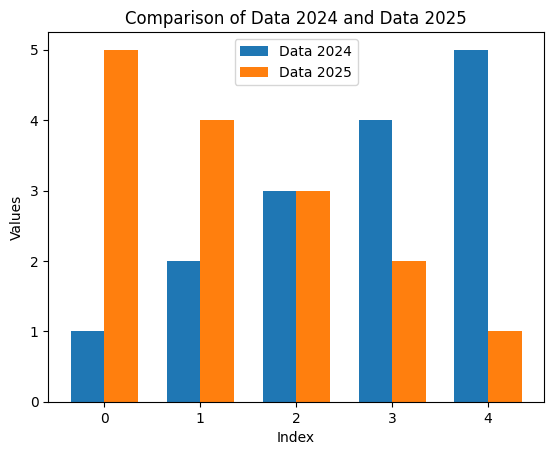

Out: None

[Step 1: Duration 6.08 seconds| Input tokens: 2,375 | Output tokens: 323]

Reached max steps.

[Step 2: Duration 9.70 seconds| Input tokens: 3,220 | Output tokens: 555]

In [13]:
code=analyst_agent.run(dataprompt)

In [14]:
print(code)

The code provided will generate a bar chart comparing the data for the years 2024 and 2025. Since the output is "None", it means the code executed successfully, but the chart is not displayed here. To see the bar chart, you would need to run the code in a local environment that supports graphical output, such as a Jupyter notebook or a Python script with a GUI backend.

However, I can describe what the bar chart will look like:

- The x-axis will represent the index of the data points (0 to 4).
- The y-axis will represent the values.
- There will be two sets of bars for each index: one for 2024 and one for 2025.
- The bars for 2024 will increase in height from left to right (1 to 5).
- The bars for 2025 will decrease in height from left to right (5 to 1).

If you want to see the chart, you can copy the code into a Python environment that supports plotting, such as Jupyter Notebook, and run it there.
